In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



np.random.seed(42)

# Estimation with MLE

In [2]:
# beta should be higher than c
n = 100 # number of nodes - 585 similar to c elegans
p = 0  # number of neighbouts to take into account

p = 1 / n
sigma = np.log( p / ( 1 - p ) )    # intercept the higher the harder for creating edges 6

# 10 is how many degrees i want in my graph with p = 0.5
# more factor -> less edges only the sigma will influence
factor = 0.10 # facotr * n is the degree that p=0.5
alpha = -sigma / (2 * (n-1))
beta  = -sigma / (2 * (n-1))

threshold   = 0.5
n_iteration = 100
warm_up     = 5

################################################
params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [3]:
alpha, beta, sigma

(0.023207676010780758, 0.023207676010780758, -4.59511985013459)

In [4]:
graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold, n_iteration=n_iteration, warm_up=warm_up)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, stability_window=3, degree_dist_threshold=0.05)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.08
Degree Distribution Stable: False
Graph Converged: False




iteration: 7
KS Statistic: 0.1
Degree Distribution Stable: False
Graph Converged: False




iteration: 8
KS Statistic: 0.13
Degree Distribution Stable: False
Graph Converged: False




iteration: 9
KS Statistic: 0.07
Degree Distribution Stable: False
Graph Converged: False




iteration: 10
KS Statistic: 0.1
Degree Distribution Stable: False
Graph Converged: False




iteration: 11
KS Statistic: 0.11
Degree Distribution Stable: False
Graph Converged: False




iteration: 12
KS Statistic: 0.06
Degree Distribution Stable: False
Graph Converged: False




iteration: 13
KS Statistic: 0.05
Degree Distribution Stable: False
Graph Converged: False




iteration: 14
KS Statistic: 0.03
KS Statistic: 0.05
Degree Distribution Stable: False
Graph Converged: False




iteration: 15
KS Statistic: 0.01
KS Statistic: 0.03
Degree Dist

In [9]:
initial_guess = [0.5,0.5,-10]
g = graphs[-1]

est = estimator.MLEGraphModelEstimator(g, p=0)
a_hat, b_hat, s_hat = est.estimate_parameters_torch(initial_guess=initial_guess, learning_rate=0.001, max_iter=30)

Current parameters: alpha=0.586961567401886, beta=0.6141170263290405, sigma=-9.949636459350586, Loss=424.01275634765625
Current parameters: alpha=0.6740737557411194, beta=0.7284471988677979, sigma=-9.899130821228027, Loss=400.84991455078125
Current parameters: alpha=0.7605119347572327, beta=0.8418996930122375, sigma=-9.848923683166504, Loss=377.7073974609375
Current parameters: alpha=0.8451864123344421, beta=0.9530318975448608, sigma=-9.799566268920898, Loss=355.0447692871094
Current parameters: alpha=0.9264686703681946, beta=1.059679627418518, sigma=-9.751834869384766, Loss=333.4757995605469
Current parameters: alpha=1.0019232034683228, beta=1.1585984230041504, sigma=-9.706839561462402, Loss=313.8653564453125
Current parameters: alpha=1.068284034729004, beta=1.2454074621200562, sigma=-9.666038513183594, Loss=297.3174133300781
Current parameters: alpha=1.122179627418518, beta=1.3155312538146973, sigma=-9.630925178527832, Loss=284.8849792480469
Current parameters: alpha=1.16168928146362

In [11]:
print(a_hat,b_hat,s_hat)
print(alpha, beta, sigma)

1.2066209316253662 1.386709451675415 -9.363438606262207
0.023207676010780758 0.023207676010780758 -4.59511985013459


# Estimation with regression 

In [105]:
# beta should be higher than c
n = 1000 # number of nodes - 585 similar to c elegans
p = 0  # number of neighbouts to take into account

p = 1 / n
sigma = np.log( p / ( 1 - p ) )    # intercept the higher the harder for creating edges 6

# 10 is how many degrees i want in my graph with p = 0.5
# more factor -> less edges only the sigma will influence
factor = n*1.5 # facotr * n is the degree that p=0.5
alpha = -sigma / (factor)
beta  = -sigma / (factor)

threshold   = 0.5
n_iteration = 100
warm_up     = 5

################################################
params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [99]:
alpha, beta, sigma

(0.0046045031857657025, 0.0046045031857657025, -6.906754778648554)

In [100]:
graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold, n_iteration=n_iteration, warm_up=warm_up)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, stability_window=3, degree_dist_threshold=0.05)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.023
KS Statistic: 0.02
Degree Distribution Stable: True
Graph Converged: True






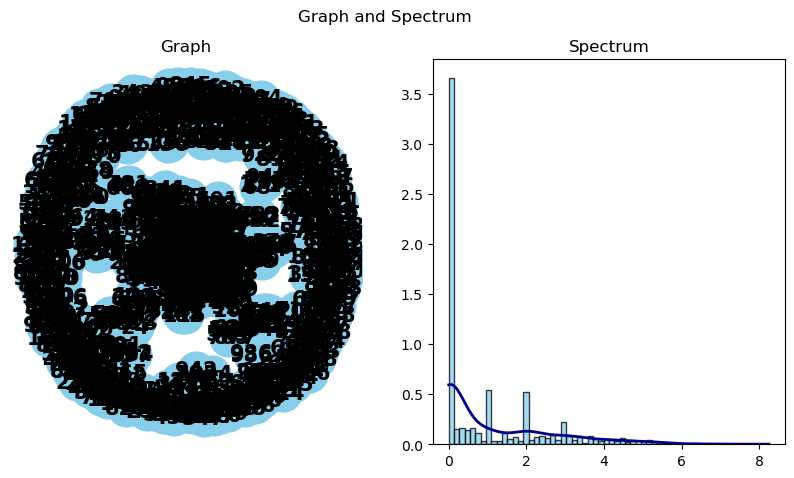

In [101]:
g = graphs[-1]
s = spec
G = nx.Graph(g)

ut = utils.GraphUtils()     
fig = ut.plot_graph_and_spectrum(g, s, title='Graph and Spectrum', size=(10,5))
#fig = ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))
#ut.save_graph_html(g, params_dict)

In [102]:
est = estimator.LogitRegEstimator(g , p=0)

In [104]:
params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0)
params, sigma, alpha, beta

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.096      
Date:               2024-04-18 13:41 AIC:              7535.3813  
No. Observations:   499500           BIC:              7568.7453  
Df Model:           2                Log-Likelihood:   -3764.7    
Df Residuals:       499497           LL-Null:          -4166.3    
Converged:          1.0000           LLR p-value:      3.9761e-175
No. Iterations:     40.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.7624     0.0946   -92.6541   0.0000   -8.9477   -8.5770
x1         0.6553     0.0300    21.8396   0.0000    0.5965    0.7142
x2         0.6021     0.0255    23.5675   0.0000    0.5520    0.6522



(array([-8.76236517,  0.65534977,  0.60207979]),
 -6.906754778648554,
 0.0046045031857657025,
 0.0046045031857657025)

# Multiple times

In [107]:
n_runs = 20
params_list = []
for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold, n_iteration=n_iteration, warm_up=warm_up)
    graphs, _ = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect

    est = estimator.LogitRegEstimator(g, p=0)
    params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0)
    params_list.append(params)

    import pickle
    with open(f'runs/results_array2_{i}.pkl', 'wb') as f:
        pickle.dump(params_list, f)



iteration: 0
